This project aims to analyze and predict Near-Earth Objects (NEOs) that may pose a threat to Earth. Using NASA data from 1910 to 2024, we apply data analysis, cleaning, and pattern exploration techniques, followed by building a machine learning model to predict whether a space object is hazardous or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


 Data Cleaning And Checking missing **values**

In [2]:

missing_values = df.isnull().sum()
print("القيم المفقودة في كل عمود:\n", missing_values)


df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)
df["estimated_diameter_min"].fillna(df["estimated_diameter_min"].mean(), inplace=True)
df["estimated_diameter_max"].fillna(df["estimated_diameter_max"].mean(), inplace=True)


print("\nبعد معالجة القيم المفقودة:\n", df.isnull().sum())


القيم المفقودة في كل عمود:
 neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

بعد معالجة القيم المفقودة:
 neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


<ipython-input-2-1bddbb9aa186>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["absolute_magnitude"].fillna(df["absolute_magnitude"].mean(), inplace=True)
<ipython-input-2-1bddbb9aa186>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

**EDA**

<ipython-input-3-8a2839afb272>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_hazardous"], palette="coolwarm")


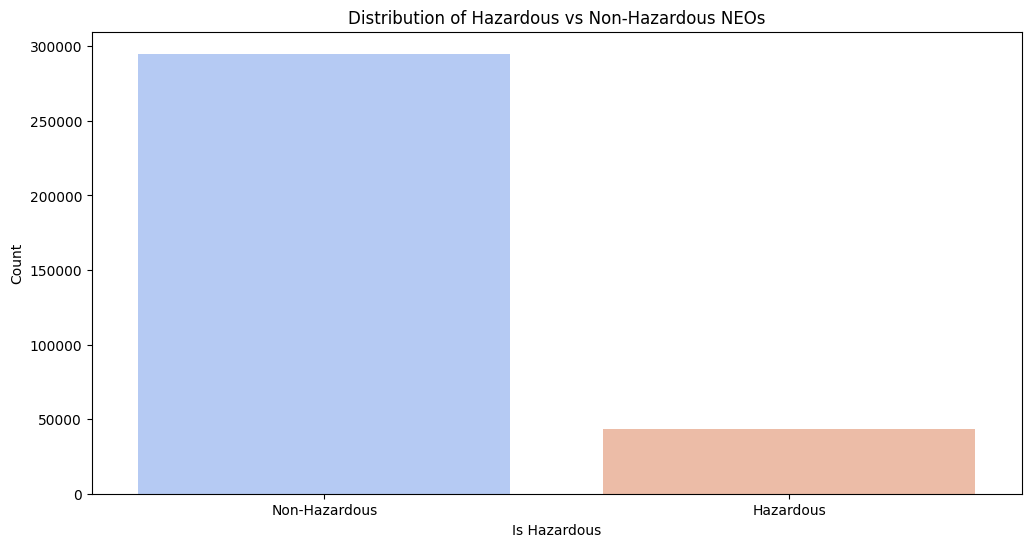

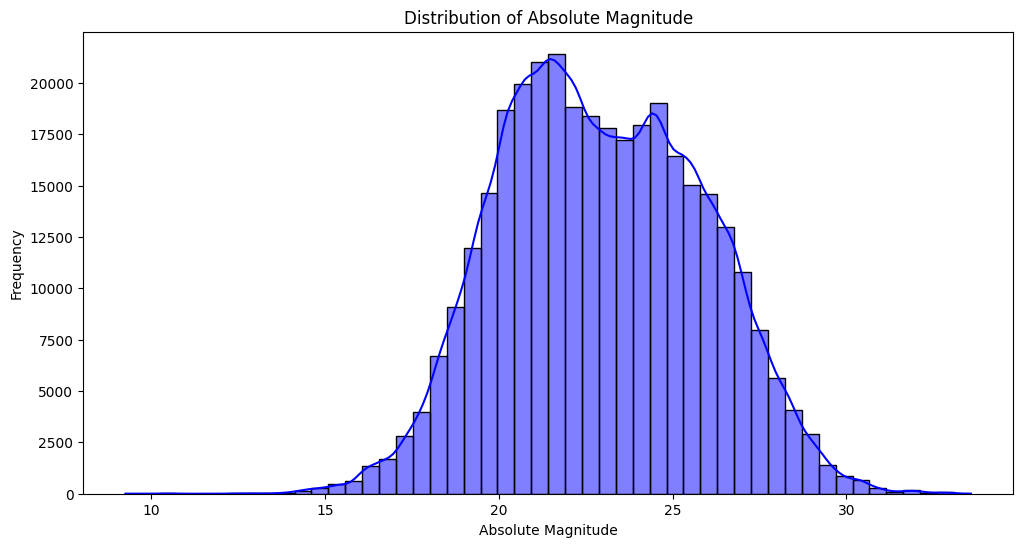

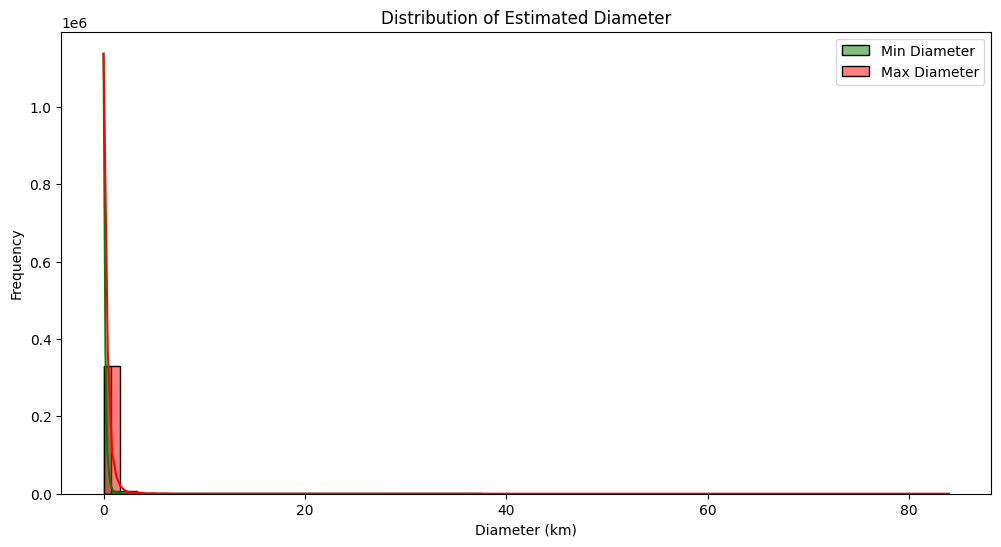

In [3]:

plt.figure(figsize=(12, 6))


sns.countplot(x=df["is_hazardous"], palette="coolwarm")
plt.title("Distribution of Hazardous vs Non-Hazardous NEOs")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Non-Hazardous", "Hazardous"])
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df["absolute_magnitude"], bins=50, kde=True, color="blue")
plt.title("Distribution of Absolute Magnitude")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df["estimated_diameter_min"], bins=50, kde=True, color="green", label="Min Diameter")
sns.histplot(df["estimated_diameter_max"], bins=50, kde=True, color="red", label="Max Diameter", alpha=0.5)
plt.title("Distribution of Estimated Diameter")
plt.xlabel("Diameter (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Feature **Relationships**

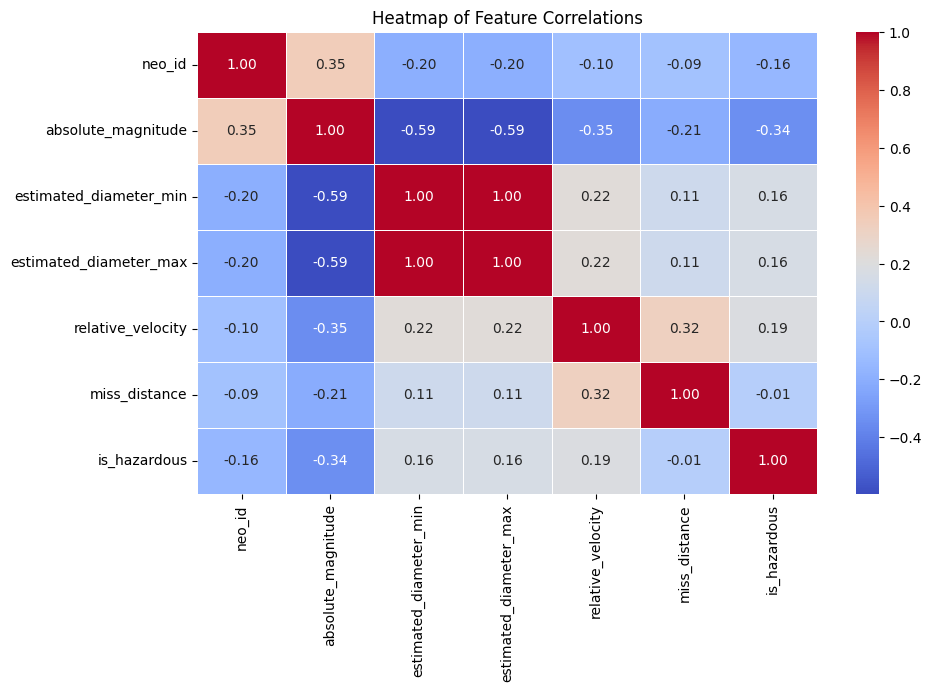

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Heatmap of Feature Correlations")


plt.show()


Preparing Data for Modeling







**bold text**

In [5]:

label_encoder = LabelEncoder()
df["orbiting_body"] = label_encoder.fit_transform(df["orbiting_body"])


features = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max",
            "relative_velocity", "miss_distance", "orbiting_body"]
target = "is_hazardous"


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((270559, 6), (67640, 6), (270559,), (67640,))

Modeling

In [6]:

logreg = LogisticRegression(class_weight="balanced", random_state=42)
logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


logreg_report = classification_report(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)

print("🔹 تقييم نموذج Logistic Regression:\n", logreg_report)
print("\n🔹 ROC AUC Score:", logreg_auc)


🔹 تقييم نموذج Logistic Regression:
               precision    recall  f1-score   support

       False       0.98      0.72      0.83     59008
        True       0.31      0.88      0.46      8632

    accuracy                           0.74     67640
   macro avg       0.64      0.80      0.64     67640
weighted avg       0.89      0.74      0.78     67640


🔹 ROC AUC Score: 0.7966056408179019
